In [3]:
datadir = '/data/special/web_viewer_verify/'
sel = [x.split('_')[-1].strip() for x in open(datadir+'/selected.csv').readlines()]

In [4]:
import sys
sys.path.append('../image_computing_base_bb')
from tiling import Accessor
from common import auto_gamma

glymur not setup correctly


In [5]:
jp2path = '/data/special/jp2cache/B_37_FB3-SL_173-ST_NISL-SE_517_lossless.dat'
accessor = Accessor(jp2path,shp=(512,512),padding=0)

In [6]:
from skimage.io import imsave
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

outdir = datadir+'/tiles'


In [7]:
import os
os.mkdir(outdir+'/original')

In [12]:
for ii in sel:
    tile,rgn,url = accessor[int(ii)]
    imsave(f'{outdir}/original/{ii}.png',tile)

In [71]:
from skimage.filters import gaussian
from scipy import stats
from skimage.filters import unsharp_mask
from skimage.transform import rescale, resize
from skimage.exposure import adjust_gamma

sl = [
    (slice(0,256),slice(0,256)),
    (slice(256,512),slice(0,256)),
    (slice(0,256),slice(256,512)),
    (slice(256,512),slice(256,512))
]

def get_subtiles(tile, bg_br_factor, gamma=None):
    
    gam = gamma
    if gamma is None:
        tile2,gam = auto_gamma(tile)
        print('gamma:',gam)
    else:
        tile2 = adjust_gamma(tile,gamma)
        print('set gamma',gamma)
        
    def apply_bg_brightening(im,im2,msk,factor=1.05):
        V = im[msk].astype(float)
        V[V<V.mean()]*=factor
        out = im.copy()
        out[msk]=V.clip(0,255).astype(im.dtype)
        out[~msk]=im2[~msk]
        return out

    
    out = []
    for sli in sl:
        R = tile[sli][...,0].astype(float)
        G = tile[sli][...,1].astype(float)
        B = tile[sli][...,2].astype(float)
        v1 = gaussian(B,sigma=2)-gaussian((R+G)/2,sigma=2)
        
        data = v1.ravel()
        res = stats.fit(stats.norm, data, [(-15,15),(0.5,5)]) 
        if res.success:
            msk = v1<res.params.loc
            newimv = []
            for ii in range(3):
                newimv.append(apply_bg_brightening(tile[sli][...,ii].copy(),tile2[sli][...,ii],msk,bg_br_factor))
                
            newim = np.dstack(newimv)
            
        else:
            print('no fit')
            newim = tile2[sli]
        
        nr,nc,d = newim.shape
        
        tile_sharp = unsharp_mask(resize(newim,output_shape=(nr*2,nc*2,3),order=3),radius=0.5, amount=5)
        
        out.append((tile_sharp*255).astype(np.uint8))
        
    return out, gam
    

In [14]:
len(sel)

37

In [45]:
ii=0
csvdata={}

# loop

In [271]:
ii=ii+1
ii,sel[ii]

IndexError: list index out of range

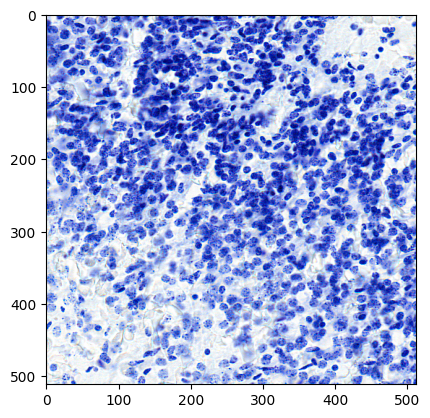

In [267]:
tile,rgn,url = accessor[int(sel[ii])]
plt.imshow(tile)

gamma: 0.6355857849121095


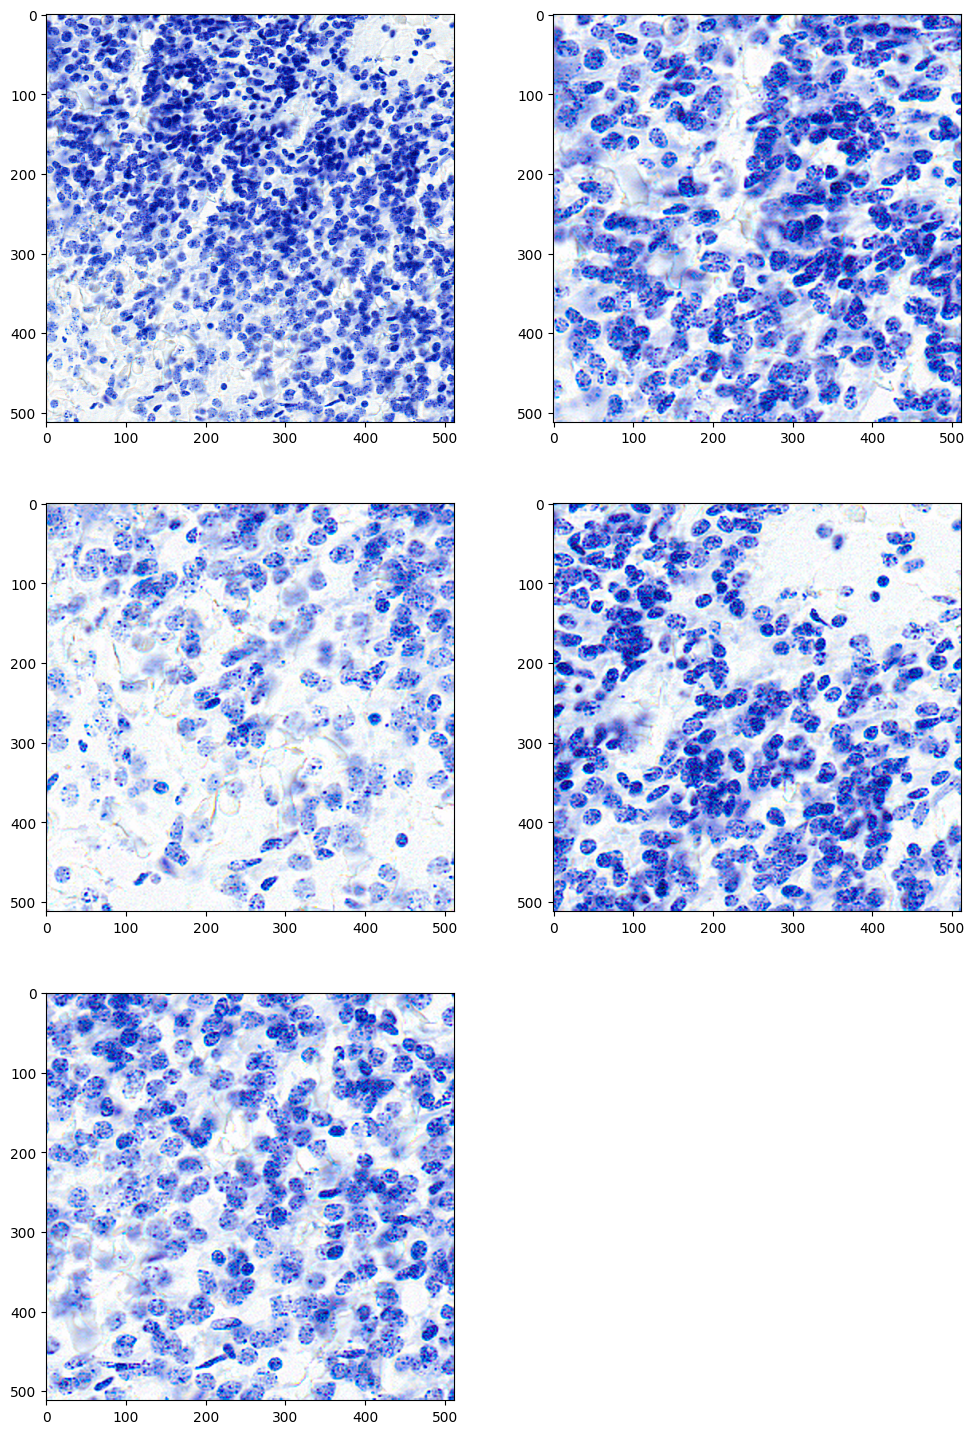

In [268]:
bg_br_factor = 1.1
out,gam = get_subtiles(tile,bg_br_factor) #,0.8)

plt.figure(figsize=(12,18))
plt.subplot(3,2,1)
plt.imshow(tile)

for jj in range(4):
    plt.subplot(3,2,jj+2)
    plt.imshow(out[jj])


In [269]:
import json
csvdata[ii] = (sel[ii],bg_br_factor,gam)

for jj in range(4):
    
    imsave(f'{outdir}/{sel[ii]}_{jj}.png',out[jj])

json.dump(csvdata,open(outdir+'/tileprepsettings.json','wt'))

In [264]:
csvdata

{0: ('10106', 1.1, 1.3137832641601563),
 1: ('10108', 1.1, 1.8625360488891605),
 2: ('10265', 1.1, 1),
 3: ('10457', 1.1, 0.8),
 4: ('1046', 1.15, 0.7178894042968751),
 5: ('1053', 1.15, 0.6),
 6: ('1210', 1.15, 0.6),
 7: ('1211', 1.15, 0.6),
 8: ('1622', 1.15, 0.6),
 9: ('18886', 1.1, 1.2924972534179688),
 10: ('236', 1.1, 0.6),
 11: ('24289', 1.1, 1.15992431640625),
 12: ('2477', 1.1, 0.6338691711425782),
 13: ('25533', 1.1, 1.1550033569335938),
 14: ('26310', 1.1, 1.1536014556884766),
 15: ('3099', 1.1, 1.370181465148926),
 16: ('388', 1.1, 0.6),
 17: ('393', 1.1, 0.6),
 18: ('4036', 1.1, 1.4531299591064455),
 19: ('406', 1.1, 0.6019756317138674),
 20: ('5126', 1.1, 0.7104507446289063),
 21: ('547', 1.1, 0.6111408233642578),
 22: ('5749', 1.1, 0.7859886169433594),
 23: ('575', 1.1, 0.6),
 24: ('5902', 1.1, 0.8),
 25: ('5904', 1.1, 0.8348766326904298),
 26: ('5905', 1.1, 0.9128463745117188),
 27: ('6835', 1.1, 1.0945785522460938),
 28: ('6837', 1.1, 1),
 29: ('6840', 1.1, 1),
 30: ('

In [270]:
len(csvdata)

37